# Task

Analyze politics party support during Polish Parliamentary Elections in 2019 on map.

Use data provided by PKW (Państwowa Komisja Wyborcza) with information on voting per Commune (Gmina) with number of votes.


# Data preparation

Lets start by importing necessary data
* Polish Parliamentary Elections in 2019 results for "Sejm" (Parliament) per Commune
* Geo data containing "Gmina" (Commune) boundaries

## Download Geo data
First, we download GIS data for Communes and Counties. We will use files provided by www.gis-support.pl

Data is in Shapefile format (https://en.wikipedia.org/wiki/Shapefile).

In [1]:
!wget -N https://www.gis-support.pl/downloads/Gminy.zip
    
!unzip -o Gminy.zip -d Data

--2019-10-22 13:34:55--  https://www.gis-support.pl/downloads/Gminy.zip
Resolving empweb1.ey.net (empweb1.ey.net)... 10.151.7.20, 10.151.7.20
Connecting to empweb1.ey.net (empweb1.ey.net)|10.151.7.20|:8443... connected.
Proxy request sent, awaiting response... 200 OK
Length: 63345639 (60M) [application/zip]
Saving to: ‘Gminy.zip’

Gminy.zip           100%[===================>]  60.41M  1.39MB/s    in 44s     

2019-10-22 13:35:47 (1.38 MB/s) - ‘Gminy.zip’ saved [63345639/63345639]

Archive:  Gminy.zip
  inflating: Data/Gminy.shx          
  inflating: Data/Gminy.dbf          
  inflating: Data/Gminy.prj          
  inflating: Data/Gminy.shp          


## Download Polish Parlamentary Election 2019 data per Commune

In [2]:
!wget -N https://wybory.gov.pl/sejmsenat2019/data/csv/wyniki_gl_na_listy_po_gminach_sejm_csv.zip
!unzip -o wyniki_gl_na_listy_po_gminach_sejm_csv.zip -d Data

--2019-10-22 13:35:54--  https://wybory.gov.pl/sejmsenat2019/data/csv/wyniki_gl_na_listy_po_gminach_sejm_csv.zip
Resolving empweb1.ey.net (empweb1.ey.net)... 10.151.7.20
Connecting to empweb1.ey.net (empweb1.ey.net)|10.151.7.20|:8443... connected.
Proxy request sent, awaiting response... 304 Not Modified
File ‘wyniki_gl_na_listy_po_gminach_sejm_csv.zip’ not modified on server. Omitting download.

Archive:  wyniki_gl_na_listy_po_gminach_sejm_csv.zip
  inflating: Data/wyniki_gl_na_listy_po_gminach_sejm.csv  


In [3]:
import pandas as pd

electionData = pd.read_csv("Data/wyniki_gl_na_listy_po_gminach_sejm.csv", sep=";")

electionData.head()

,Kod TERYT,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,Nie wykorzystano kart do głosowania,"Liczba wyborców, którym wydano karty do głosowania",Liczba wyborców głosujących przez pełnomocnika,Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania,...,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,20101,m. Bolesławiec,bolesławiecki,dolnośląskie,27857,29895,9656,18201,17,96,...,4308,NaN,1109,972,NaN,6445,NaN,3997,1158.0,NaN
1,20102,gm. Bolesławiec,bolesławiecki,dolnośląskie,10224,11171,3907,6317,0,29,...,1197,NaN,472,577,NaN,2716,NaN,930,331.0,NaN
2,20103,gm. Gromadka,bolesławiecki,dolnośląskie,4014,4306,1739,2274,1,8,...,287,NaN,117,154,NaN,1128,NaN,428,106.0,NaN
3,20104,gm. Nowogrodziec,bolesławiecki,dolnośląskie,10637,11683,4937,5700,1,24,...,878,NaN,432,537,NaN,2980,NaN,545,219.0,NaN
4,20105,gm. Osiecznica,bolesławiecki,dolnośląskie,4905,5392,2212,2693,0,36,...,509,NaN,183,216,NaN,1200,NaN,410,108.0,NaN


We have Gmina (Commune) columns. Lets rename that

In [4]:
electionData.rename(columns={"Gmina": "Commune"}, inplace=True)

In [5]:
electionData.head()

,Kod TERYT,Commune,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,Nie wykorzystano kart do głosowania,"Liczba wyborców, którym wydano karty do głosowania",Liczba wyborców głosujących przez pełnomocnika,Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania,...,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,20101,m. Bolesławiec,bolesławiecki,dolnośląskie,27857,29895,9656,18201,17,96,...,4308,NaN,1109,972,NaN,6445,NaN,3997,1158.0,NaN
1,20102,gm. Bolesławiec,bolesławiecki,dolnośląskie,10224,11171,3907,6317,0,29,...,1197,NaN,472,577,NaN,2716,NaN,930,331.0,NaN
2,20103,gm. Gromadka,bolesławiecki,dolnośląskie,4014,4306,1739,2274,1,8,...,287,NaN,117,154,NaN,1128,NaN,428,106.0,NaN
3,20104,gm. Nowogrodziec,bolesławiecki,dolnośląskie,10637,11683,4937,5700,1,24,...,878,NaN,432,537,NaN,2980,NaN,545,219.0,NaN
4,20105,gm. Osiecznica,bolesławiecki,dolnośląskie,4905,5392,2212,2693,0,36,...,509,NaN,183,216,NaN,1200,NaN,410,108.0,NaN


Hmm...

In our **"Commune"** column we have **"m."** and **"gm."** prefixes. It looks like that they are:

**gm.** - for Gmina (Commune)  
**m.** - for Miasto (City)

This is becouse in Poland a City could be also a Commune.


Lets check "Bolesławiec" for example.

In [6]:
electionData[electionData["Commune"].str.contains("Bolesławiec")].head()


,Kod TERYT,Commune,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,Nie wykorzystano kart do głosowania,"Liczba wyborców, którym wydano karty do głosowania",Liczba wyborców głosujących przez pełnomocnika,Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania,...,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,20101,m. Bolesławiec,bolesławiecki,dolnośląskie,27857,29895,9656,18201,17,96,...,4308,NaN,1109,972,NaN,6445,NaN,3997,1158.0,NaN
1,20102,gm. Bolesławiec,bolesławiecki,dolnośląskie,10224,11171,3907,6317,0,29,...,1197,NaN,472,577,NaN,2716,NaN,930,331.0,NaN
5,20106,gm. Warta Bolesławiecka,bolesławiecki,dolnośląskie,6143,6651,2717,3426,3,10,...,624,NaN,245,285,NaN,1667,NaN,406,142.0,NaN
757,101801,gm. Bolesławiec,wieruszowski,łódzkie,3003,3285,1234,1769,0,13,...,199,NaN,149,256,NaN,937,NaN,158,23.0,NaN


We could see, that there is a Commune in **"bolesławiecki"** County as well as City (two separate records).

But also - there is a Commune named **"Bolesławiecki"** in **"wieruszowski"** County!

This means, that in order to correctly map our Election Data to map, we also need County polygons.

So, lets download County Shapefiles

In [7]:
!wget -N https://www.gis-support.pl/downloads/Powiaty.zip
!unzip -o Powiaty.zip -d Data 

--2019-10-22 13:35:57--  https://www.gis-support.pl/downloads/Powiaty.zip
Resolving empweb1.ey.net (empweb1.ey.net)... 10.151.7.20
Connecting to empweb1.ey.net (empweb1.ey.net)|10.151.7.20|:8443... connected.
Proxy request sent, awaiting response... 200 OK
Length: 27121512 (26M) [application/zip]
Saving to: ‘Powiaty.zip’

Powiaty.zip         100%[===================>]  25.86M  1.37MB/s    in 20s     

2019-10-22 13:36:18 (1.28 MB/s) - ‘Powiaty.zip’ saved [27121512/27121512]

Archive:  Powiaty.zip
  inflating: Data/Powiaty.shx        
  inflating: Data/Powiaty.dbf        
  inflating: Data/Powiaty.prj        
  inflating: Data/Powiaty.shp        


# Geo data inspection

In [8]:
import geopandas as gpd
import geoplot as gplt

communeGeo = gpd.read_file("Data/Gminy.shp")
communeGeo.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,GMI,2602042,NagÅowice,None,13031,2012-09-26,None,2012-09-26,None,None,...,2602042,None,None,UZG,0,826826,None,0.752667,0.014911,"POLYGON ((20.13719 50.59346, 20.13708 50.59347..."
1,GMI,2602063,SÄdziszÃ³w,None,13031,2012-09-26,None,2012-09-26,None,None,...,2602063,None,None,UZG,0,826829,None,0.938870,0.018474,"POLYGON ((20.03891 50.50016, 20.03875 50.50018..."
2,GMI,2602012,Imielno,None,13031,2012-09-26,None,2012-09-26,None,None,...,2602012,None,None,UZG,0,826821,None,0.681138,0.012817,"POLYGON ((20.45329 50.52787, 20.45272 50.52793..."
3,GMI,2604012,Bieliny,None,13033,2012-09-26,None,2012-09-26,None,None,...,2604012,None,None,UZG,0,826842,None,0.552883,0.011258,"POLYGON ((20.96475 50.77738, 20.96327 50.77760..."
4,GMI,2604112,MniÃ³w,None,13033,2012-09-26,None,2012-09-26,None,None,...,2604112,None,None,UZG,0,826851,None,0.905760,0.012202,"POLYGON ((20.50760 50.95793, 20.50742 50.95794..."


In [9]:
countyGeo = gpd.read_file("Data/Powiaty.shp")
countyGeo.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,POW,1815,powiat ropczycko-sÄdziszowski,None,13415,2012-09-26,None,2012-09-26,None,None,...,1815,None,None,UZG,0,829084,None,1.776163,0.068825,"POLYGON ((21.69429 50.17849, 21.69440 50.17849..."
1,POW,1410,powiat Åosicki,None,13409,2012-09-26,None,2012-09-26,None,None,...,1410,None,None,UZG,0,829095,None,2.220227,0.101595,"POLYGON ((22.72381 52.28039, 22.72379 52.28043..."
2,POW,1418,powiat piaseczyÅski,None,13409,2012-09-26,None,2012-09-26,None,None,...,1418,None,None,UZG,0,829103,None,1.947858,0.081285,"POLYGON ((21.11010 52.11317, 21.10875 52.11459..."
3,POW,1425,powiat radomski,None,13409,2012-09-26,None,2012-09-26,None,None,...,1425,None,None,UZG,0,829110,None,4.427170,0.197463,"POLYGON ((20.98915 51.48947, 20.98919 51.48942..."
4,POW,1427,powiat sierpecki,None,13409,2012-09-26,None,2012-09-26,None,None,...,1427,None,None,UZG,0,829112,None,2.138918,0.113594,"POLYGON ((19.50876 52.86784, 19.50873 52.86795..."


Looks like encoding is broken in both SHP. 

We need UTF-8.

In [10]:
!ogr2ogr Data/Gminy_utf8.shp Data/Gminy.shp -lco ENCODING=UTF-8
!ogr2ogr Data/Powiaty_utf8.shp Data/Powiaty.shp -lco ENCODING=UTF-8

In [11]:
communeGeo = gpd.read_file("Data/Gminy_utf8.shp")
communeGeo.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,GMI,2602042,Nagłowice,None,13031,2012-09-26,None,2012-09-26,None,None,...,2602042,None,None,UZG,0,826826,None,0.752667,0.014911,"POLYGON ((20.13719 50.59346, 20.13708 50.59347..."
1,GMI,2602063,Sędziszów,None,13031,2012-09-26,None,2012-09-26,None,None,...,2602063,None,None,UZG,0,826829,None,0.938870,0.018474,"POLYGON ((20.03891 50.50016, 20.03875 50.50018..."
2,GMI,2602012,Imielno,None,13031,2012-09-26,None,2012-09-26,None,None,...,2602012,None,None,UZG,0,826821,None,0.681138,0.012817,"POLYGON ((20.45329 50.52787, 20.45272 50.52793..."
3,GMI,2604012,Bieliny,None,13033,2012-09-26,None,2012-09-26,None,None,...,2604012,None,None,UZG,0,826842,None,0.552883,0.011258,"POLYGON ((20.96475 50.77738, 20.96327 50.77760..."
4,GMI,2604112,Mniów,None,13033,2012-09-26,None,2012-09-26,None,None,...,2604112,None,None,UZG,0,826851,None,0.905760,0.012202,"POLYGON ((20.50760 50.95793, 20.50742 50.95794..."


Great!

Now lets peek into our Commune map data with Geoplot

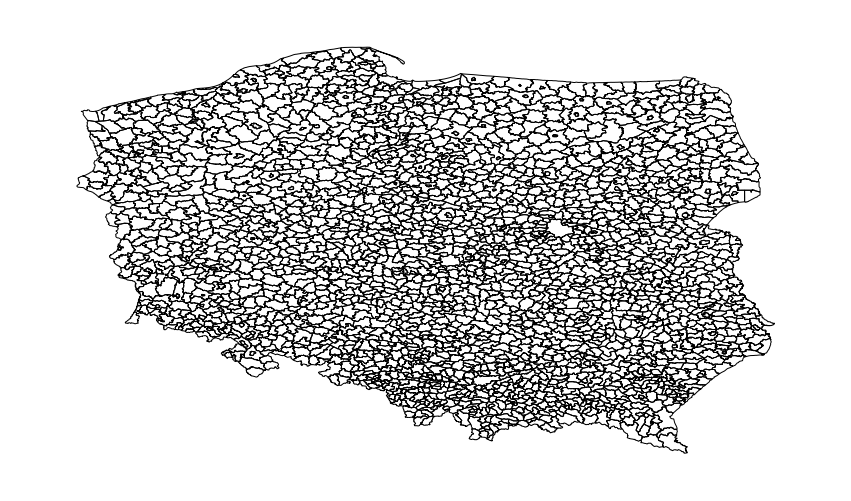

In [12]:
gplt.polyplot(communeGeo, figsize=(15, 15))

As we can see, boundaries are very detailed. We don't need that level of boundary accuracy.  
Moreover, trying to plot draw that map with KeplerGL fails.  

We will try to simplify this map a little bit.  

In [13]:
simplifiedCommuneGeo = communeGeo.copy()
simplifiedCommuneGeo["geometry"] = simplifiedCommuneGeo.simplify(0.0005, preserve_topology=False)

Lets see how it looks on map

In [14]:
from keplergl import KeplerGl

map_2 = KeplerGl(height=400, data={"Communes": simplifiedCommuneGeo})
map_2

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'Communes':      JPT_SJR_KO JPT_KOD_JE         JPT_NAZWA_ JPT_ORGAN_  JPT_JOR_ID  \
0          …

Success!  

Without polygon simplification, our data was too complex for KeplerGL.
Everything was laggy.

## Clean data

Lets see if there are any duplicated values for County column

In [16]:
#from keplergl import KeplerGl
#countyMap = KeplerGl(height=400)

#for x in counties.groupby(['County']):
#    if(x[0] == "Bolesławiec" and len(x[1].geometry) > 1):
#        countyMap.add_data(data=x[1], name=x[0])
        #print(x[0])
        #print(x[1].geometry)

#from keplergl import KeplerGl
#countyMap = KeplerGl(height=400)
#countyMap.add_data(data=duplicates, name='County duplicates')

countyMap

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


NameError: name 'counties' is not defined